# Лабораторная работа 2

In [5]:
import numpy as np 
import scipy.stats as stats

# Шаг 1: Генерируем выборку роста 50 студентов
np.random.seed(49)  # для воспроизводимости результатов
mu = 175           # среднее генеральной совокупности
sigma = 8          # стандартное отклонение генеральной совокупности
n = 50             # размер выборки

sample = np.random.normal(mu, sigma, n)
print(f"Выборка первых 10 значений: {sample[:10]}")
print(f"Размер выборки: {len(sample)}")

# Шаг 2: Рассчитываем выборочные характеристики
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # ddof=1 для несмещенной оценки (выборочное стандартное отклонение)
print(f"\nВыборочное среднее: {sample_mean:.2f} см")
print(f"Выборочное стандартное отклонение: {sample_std:.2f} см")

# Шаг 3: 95% ДИ при ИЗВЕСТНОМ стандартном отклонении (z-интервал)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)

# Вручную по формуле
margin_of_error_known = z_critical * (sigma / np.sqrt(n))
ci_known_lower = sample_mean - margin_of_error_known
ci_known_upper = sample_mean + margin_of_error_known

print(f"\n95% ДИ при ИЗВЕСТНОМ стандартном отклонении:")
print(f"Критическое значение z: {z_critical:.4f}")
print(f"Погрешность: ±{margin_of_error_known:.2f} см")
print(f"ДИ (вручную): ({ci_known_lower:.2f}, {ci_known_upper:.2f})")

# Шаг 4: 95% ДИ при НЕИЗВЕСТНОМ стандартном отклонении (t-интервал)
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Вручную по формуле
margin_of_error_unknown = t_critical * (sample_std / np.sqrt(n))
ci_unknown_lower = sample_mean - margin_of_error_unknown
ci_unknown_upper = sample_mean + margin_of_error_unknown

print(f"\n95% ДИ при НЕИЗВЕСТНОМ стандартном отклонении:")
print(f"Критическое значение t: {t_critical:.4f} (степеней свободы: {n-1})")
print(f"Погрешность: ±{margin_of_error_unknown:.2f} см")
print(f"ДИ (вручную): ({ci_unknown_lower:.2f}, {ci_unknown_upper:.2f})")

# Шаг 5: Сравнение ширины интервалов
width_known = ci_known_upper - ci_known_lower
width_unknown = ci_unknown_upper - ci_unknown_lower

print(f"\nСравнение ширины интервалов:")
print(f"Ширина ДИ с известным σ: {width_known:.2f} см")
print(f"Ширина ДИ с неизвестным σ: {width_unknown:.2f} см")
print(f"Разница в ширине: {abs(width_known - width_unknown):.2f} см")

# Шаг 6: Расчет ДИ одной функцией из библиотеки
# Для неизвестного стандартного отклонения
ci_library = stats.t.interval(confidence=0.95, df=n-1, loc=sample_mean, scale=sample_std/np.sqrt(n))
print(f"\n95% ДИ библиотечной функцией (t-интервал): ({ci_library[0]:.2f}, {ci_library[1]:.2f})")

# Проверка совпадения с нашим ручным расчетом
print(f"Совпадает с ручным расчетом: {np.allclose([ci_unknown_lower, ci_unknown_upper], ci_library)}")

Выборка первых 10 значений: [166.65472737 168.43315447 180.32116684 189.5810149  163.46733272
 176.87046428 177.71695467 176.8497097  174.92059342 189.43078228]
Размер выборки: 50

Выборочное среднее: 175.71 см
Выборочное стандартное отклонение: 8.01 см

95% ДИ при ИЗВЕСТНОМ стандартном отклонении:
Критическое значение z: 1.9600
Погрешность: ±2.22 см
ДИ (вручную): (173.50, 177.93)

95% ДИ при НЕИЗВЕСТНОМ стандартном отклонении:
Критическое значение t: 2.0096 (степеней свободы: 49)
Погрешность: ±2.28 см
ДИ (вручную): (173.44, 177.99)

Сравнение ширины интервалов:
Ширина ДИ с известным σ: 4.43 см
Ширина ДИ с неизвестным σ: 4.56 см
Разница в ширине: 0.12 см

95% ДИ библиотечной функцией (t-интервал): (173.44, 177.99)
Совпадает с ручным расчетом: True


In [6]:
import numpy as np
import scipy.stats as stats
from scipy.stats import bootstrap
import matplotlib.pyplot as plt

# Шаг 1: Генерируем выборку роста 50 студентов
np.random.seed(49)  # для воспроизводимости результатов
mu = 175           # среднее генеральной совокупности
sigma = 8          # стандартное отклонение генеральной совокупности
n = 50             # размер выборки

sample = np.random.normal(mu, sigma, n)
print(f"Выборка первых 10 значений: {sample[:10]}")
print(f"Размер выборки: {len(sample)}")

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
print(f"\nВыборочное среднее: {sample_mean:.2f} см")
print(f"Выборочное стандартное отклонение: {sample_std:.2f} см")

def bootstrap_confidence_interval(data, n_bootstrap=10000, confidence_level=0.95):
    bootstrap_means = []
    n = len(data)

    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    alpha = (1 - confidence_level) / 2
    basic_lower = 2 * np.mean(data) - np.percentile(bootstrap_means, 100 * (1 - alpha))
    basic_upper = 2 * np.mean(data) - np.percentile(bootstrap_means, 100 * alpha)
    
    return (basic_lower, basic_upper), bootstrap_means

(basic_lower, basic_upper),bootstrap_means = bootstrap_confidence_interval(sample)

print()
print(f"({basic_lower:.2f}, {basic_upper:.2f})")

Выборка первых 10 значений: [166.65472737 168.43315447 180.32116684 189.5810149  163.46733272
 176.87046428 177.71695467 176.8497097  174.92059342 189.43078228]
Размер выборки: 50

Выборочное среднее: 175.71 см
Выборочное стандартное отклонение: 8.01 см

(173.54, 177.93)


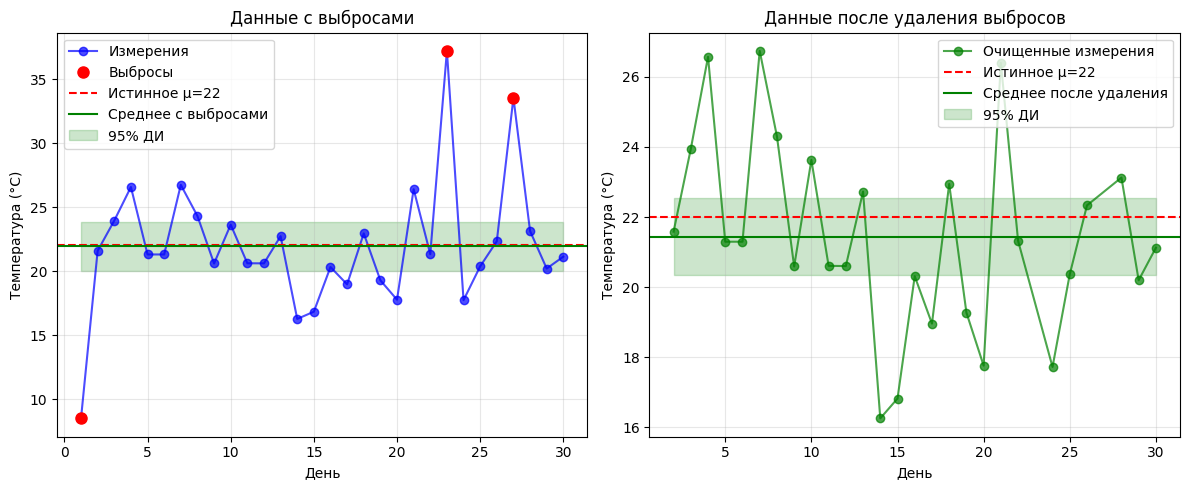

C:\Users\User\AppData\Local\Temp\ipykernel_26208\2798529159.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ci_data, labels=labels, vert=True, patch_artist=True)


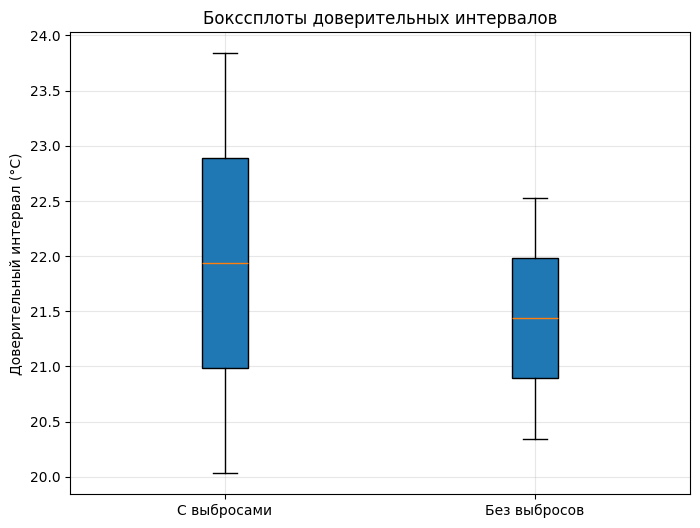

с выбросами : 20.0320212503083, 23.83909737458546
без выбросов : 20.345662125993083, 22.53041439493847


In [7]:
import matplotlib.pyplot as plt
np.random.seed(42)
days = 30
mu = 22
sigma = 3
temperatures = np.random.normal(mu, sigma, days)

# Добавление выбросов
outlier_indices = np.random.choice(days, 3, replace=False)
outlier_signs = np.random.choice([-1, 1], 3) 
temperatures_with_outliers = temperatures.copy()
temperatures_with_outliers[outlier_indices] += outlier_signs * 15

# Функция для доверительного интервала
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

# Удаление выбросов
def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    no_outlier_mask = (data >= lower_bound) & (data <= upper_bound)
    return data[no_outlier_mask], no_outlier_mask

# Расчёты для данных с выбросами
mean_orig, ci_lower_orig, ci_upper_orig = confidence_interval(temperatures_with_outliers)

# Обработка выбросов
cleaned_temperatures, clean_mask = remove_outliers_iqr(temperatures_with_outliers)

# Расчёты для очищенных данных
mean_clean, ci_lower_clean, ci_upper_clean = confidence_interval(cleaned_temperatures)

# Визуализация
plt.figure(figsize=(12, 5))

# 1. Данные с выбросами
plt.subplot(1, 2, 1)
all_days = np.arange(1, days + 1)
plt.plot(all_days, temperatures_with_outliers, 'bo-', alpha=0.7, label='Измерения')
# Выбросы красными точками
outlier_days = all_days[~clean_mask]
outlier_temps = temperatures_with_outliers[~clean_mask]
plt.plot(outlier_days, outlier_temps, 'ro', markersize=8, label='Выбросы')
plt.axhline(y=mu, color='r', linestyle='--', label=f'Истинное μ={mu}')
plt.axhline(y=mean_orig, color='g', linestyle='-', label='Среднее с выбросами')
plt.fill_between([1, days], ci_lower_orig, ci_upper_orig, alpha=0.2, color='green', label='95% ДИ')
plt.xlabel('День')
plt.ylabel('Температура (°C)')
plt.title('Данные с выбросами')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Очищенные данные
plt.subplot(1, 2, 2)
clean_days = all_days[clean_mask]
plt.plot(clean_days, cleaned_temperatures, 'go-', alpha=0.7, label='Очищенные измерения')
plt.axhline(y=mu, color='r', linestyle='--', label=f'Истинное μ={mu}')
plt.axhline(y=mean_clean, color='g', linestyle='-', label='Среднее после удаления')
plt.fill_between([min(clean_days), max(clean_days)], ci_lower_clean, ci_upper_clean, alpha=0.2, color='green', label='95% ДИ')
plt.xlabel('День')
plt.ylabel('Температура (°C)')
plt.title('Данные после удаления выбросов')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Теперь боксплоты для доверительных интервалов
plt.figure(figsize=(8, 6))
ci_data = [ [ci_lower_orig, ci_upper_orig], [ci_lower_clean, ci_upper_clean] ]
labels = ['С выбросами', 'Без выбросов']
# Боксплоты для доверительных интервалов
plt.boxplot(ci_data, labels=labels, vert=True, patch_artist=True)
plt.ylabel('Доверительный интервал (°C)')
plt.title('Бокссплоты доверительных интервалов')
plt.grid(True, alpha=0.3)
plt.show()
print(f'с выбросами : {ci_lower_orig}, {ci_upper_orig}')
print(f'без выбросов : {ci_lower_clean}, {ci_upper_clean}')

Статистика времени доставки:
Медиана: 14.7 мин
Среднее: 18.0 мин
Стандартное отклонение: 10.2 мин

90% Доверительные интервалы для медианы:
Базовый (ручной):   [13.13, 19.16]
Базовый (scipy):    [10.17, 16.20]
Ускоренный (BCa):    [13.13, 19.34]


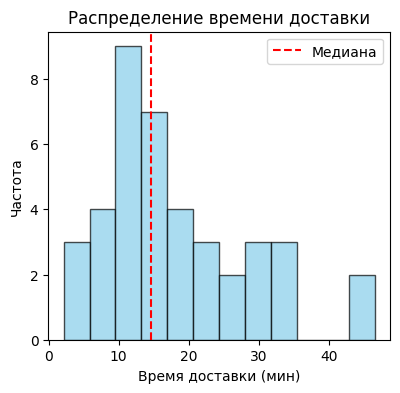

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# Генерация данных
np.random.seed(42)
delivery_times = np.random.gamma(shape=2, scale=10, size=40)

print("Статистика времени доставки:")
print(f"Медиана: {np.median(delivery_times):.1f} мин")
print(f"Среднее: {np.mean(delivery_times):.1f} мин")
print(f"Стандартное отклонение: {np.std(delivery_times):.1f} мин")

# Визуализация распределения
plt.figure(figsize=(15, 4))

# Гистограмма
plt.subplot(1, 3, 1)
plt.hist(delivery_times, bins=12, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.median(delivery_times), color='red', linestyle='--', label='Медиана')
plt.xlabel('Время доставки (мин)')
plt.ylabel('Частота')
plt.title('Распределение времени доставки')
plt.legend()


# Ручная реализация базового бутстрепа
def manual_bootstrap(data, n_bootstrap=10000, confidence=0.90):
    n = len(data)
    bootstrap_medians = []

    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrap_medians.append(np.median(sample))

    alpha = (1 - confidence) / 2
    lower = np.percentile(bootstrap_medians, 100 * alpha)
    upper = np.percentile(bootstrap_medians, 100 * (1 - alpha))

    return lower, upper

# Бутстреп доверительные интервалы
manual_lower, manual_upper = manual_bootstrap(delivery_times)

# Scipy базовый бутстреп
bootstrap_basic = bootstrap((delivery_times,), np.median, n_resamples=10000,
                           confidence_level=0.90, method='basic')

# Scipy ускоренный бутстреп
bootstrap_bca = bootstrap((delivery_times,), np.median, n_resamples=1000,
                         confidence_level=0.90, method='BCa')

print(f"\n90% Доверительные интервалы для медианы:")
print(f"Базовый (ручной):   [{manual_lower:.2f}, {manual_upper:.2f}]")
print(f"Базовый (scipy):    [{bootstrap_basic.confidence_interval.low:.2f}, {bootstrap_basic.confidence_interval.high:.2f}]")
print(f"Ускоренный (BCa):    [{bootstrap_bca.confidence_interval.low:.2f}, {bootstrap_bca.confidence_interval.high:.2f}]")